## Covid-19 Cases

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

In [2]:
data_path = "../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
pd_raw = pd.read_csv(data_path)
    
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base = pd_data_base.drop(['Lat', 'Long'],axis=1)

In [3]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180086,180122,180174,180259,180347,180419,180520,180584,180615,180615
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276048,276081,276101,276101,276101,276221,276221,276310,276342,276401
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265870,265873,265873,265877,265884,265887,265889,265889,265889,265897
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,43067,43067,43067
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99527,99527,99527,99761,99761,99761,99761,99761,99761,99761


In [4]:
countries = pd_data_base['country']

In [5]:
df_cases_countries = pd.DataFrame({'date':pd_raw.columns[4:]})
df_cases_countries

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
861,6/1/22
862,6/2/22
863,6/3/22
864,6/4/22


In [6]:
for country in countries:
    # add for each country a new column in df_cases_countries by summing up values of each Province/State with corresponding country
    df_cases_countries[country] = np.array(pd_raw[pd_raw['Country/Region']==country].iloc[:,4::].sum(axis=0))

In [7]:
df_cases_countries.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


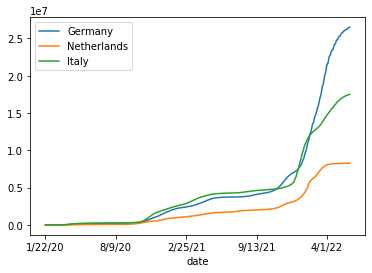

In [8]:
countries_plot = ["Germany", "Netherlands", "Italy"]

%matplotlib inline
df_cases_countries.set_index('date')[countries_plot].plot()

In [9]:
df_cases_countries.to_csv("../data/processed/COVID_cases_countries.csv", sep=";", index=False)

## Covid-19 Vaccinations (Alternative to next Source)
Many data (e.g. Germany) not complete!

In [10]:
data_path = "../data/raw/vaccination/COVID-19/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"
pd_raw = pd.read_csv(data_path)
# pd_raw = pd_raw.iloc[:50,:]
pd_raw[pd_raw['Country_Region']=='Germany']


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
97,Germany,2020-12-27,24474.0,24463.0,11.0,2020-12-27,276.0,NaN
124,Germany,2020-12-28,42815.0,42804.0,11.0,2020-12-28,276.0,NaN
159,Germany,2020-12-29,92364.0,91764.0,600.0,2020-12-29,276.0,NaN
195,Germany,2020-12-30,154904.0,154300.0,604.0,2020-12-30,276.0,NaN
235,Germany,2020-12-31,204999.0,204255.0,744.0,2020-12-31,276.0,NaN
...,...,...,...,...,...,...,...,...
245974,Germany,2022-06-04,7295614.0,NaN,NaN,2022-06-05,27613.0,Sachsen
245975,Germany,2022-06-04,4431193.0,NaN,NaN,2022-06-05,27614.0,Sachsen-Anhalt
245976,Germany,2022-06-04,6980756.0,NaN,NaN,2022-06-05,27615.0,Schleswig-Holstein
245977,Germany,2022-06-04,4091568.0,NaN,NaN,2022-06-05,27616.0,Thuringen


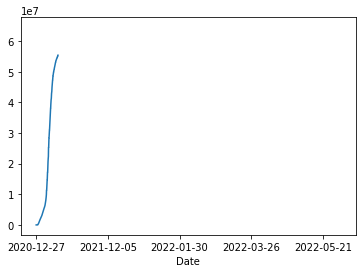

In [11]:
plt.figure()
ax = pd_raw[(pd_raw['Country_Region']=='Germany')].set_index('Date')['People_fully_vaccinated'].plot()     # data not very long available!

In [12]:
pd_raw[pd_raw['Country_Region']=='Germany']

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
97,Germany,2020-12-27,24474.0,24463.0,11.0,2020-12-27,276.0,NaN
124,Germany,2020-12-28,42815.0,42804.0,11.0,2020-12-28,276.0,NaN
159,Germany,2020-12-29,92364.0,91764.0,600.0,2020-12-29,276.0,NaN
195,Germany,2020-12-30,154904.0,154300.0,604.0,2020-12-30,276.0,NaN
235,Germany,2020-12-31,204999.0,204255.0,744.0,2020-12-31,276.0,NaN
...,...,...,...,...,...,...,...,...
245974,Germany,2022-06-04,7295614.0,NaN,NaN,2022-06-05,27613.0,Sachsen
245975,Germany,2022-06-04,4431193.0,NaN,NaN,2022-06-05,27614.0,Sachsen-Anhalt
245976,Germany,2022-06-04,6980756.0,NaN,NaN,2022-06-05,27615.0,Schleswig-Holstein
245977,Germany,2022-06-04,4091568.0,NaN,NaN,2022-06-05,27616.0,Thuringen


In [13]:
countries = pd_raw['Country_Region']
# df_vacc_countries = pd.DataFrame({'date':pd_raw['Date'].drop_duplicates()})
# for date in df_vacc_countries['date']:
#     for country in countries:
#         df_vacc_countries[country] = np.array(pd_raw[(pd_raw['Country_Region']==country) & (pd_raw['Date']==date)].iloc[:,4].sum(axis=0))
# df_vacc_countries.head()

## Vaccinations "Our World in Data"

In [14]:
data_path = "../data/raw/vaccinations/covid-19-data/public/data/vaccinations/vaccinations.csv"
pd_raw = pd.read_csv(data_path)
# pd_raw = pd_raw.iloc[:50,:]
pd_raw.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


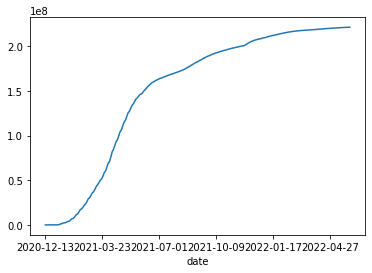

In [15]:
plt.figure()
ax = pd_raw[(pd_raw['location']=='United States')].set_index('date')['people_fully_vaccinated'].plot()

In [16]:
countries = pd_raw['location'].drop_duplicates()
df_vacc_countries = pd.DataFrame({'date':pd_raw['date'].drop_duplicates()})
# pd_raw.set_index('date', inplace=True)
df_vacc_countries.set_index('date', inplace=True)
# df_vacc_countries[country] = np.array(pd_raw.loc[(pd_raw['location']=='Afghanistan') & (pd_raw['date']=='2021-02-25')])
for country in countries:
    df_country = pd.DataFrame({'date': pd_raw.loc[pd_raw['location']==country]['date'], country: pd_raw.loc[pd_raw['location']==country]['people_fully_vaccinated']})
    df_country.set_index('date', inplace=True)
    df_vacc_countries = df_vacc_countries.join(df_country, how='outer')
df_vacc_countries

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,4807917.0,238257581.0,NaN,NaN,NaN,NaN,NaN,NaN,22953696.0,NaN,...,NaN,NaN,NaN,79308876.0,NaN,NaN,4.721546e+09,NaN,NaN,4524043.0
2022-06-02,NaN,238535512.0,NaN,NaN,NaN,NaN,NaN,NaN,22956316.0,NaN,...,NaN,NaN,NaN,79331294.0,NaN,NaN,4.722198e+09,NaN,3534173.0,4525568.0
2022-06-03,NaN,238696089.0,NaN,NaN,NaN,NaN,NaN,NaN,22958946.0,NaN,...,NaN,NaN,NaN,79373469.0,NaN,NaN,4.723695e+09,NaN,3674839.0,4529357.0


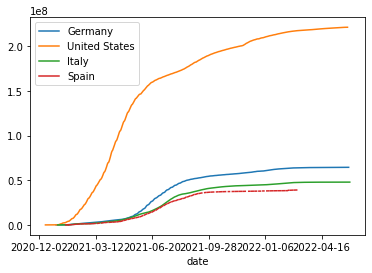

In [17]:
countries_plot = ["Germany", "United States", "Italy", "Spain"]

%matplotlib inline
df_vacc_countries[countries_plot].plot()

In [20]:
df_vacc_countries.to_csv("../data/processed/COVID_vaccinations_countries.csv", sep=";", index=True)